In [ ]:
#p 316

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("auto-mpg.csv", header = 0)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
#drop columns + 
df = df.drop(['horsepower', 'origin', 'car_name'], axis=1, inplace=False)
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [9]:
df.shape

(398, 6)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y = df['mpg']
X =df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
lr = LinearRegression().fit(X_train, y_train)

In [14]:
y_predict = lr.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 11.626, RMSE : 3.410
R^2(Variance score) : 0.814


In [21]:
print('Y절편', np.round(lr.intercept_, 2))
print('회귀계수값', np.round(lr.coef_, 2))

Y절편 -17.09
회귀계수값 [-0.07  0.01 -0.01  0.2   0.75]


In [25]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.75
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.07
dtype: float64

In [29]:
import seaborn as sns

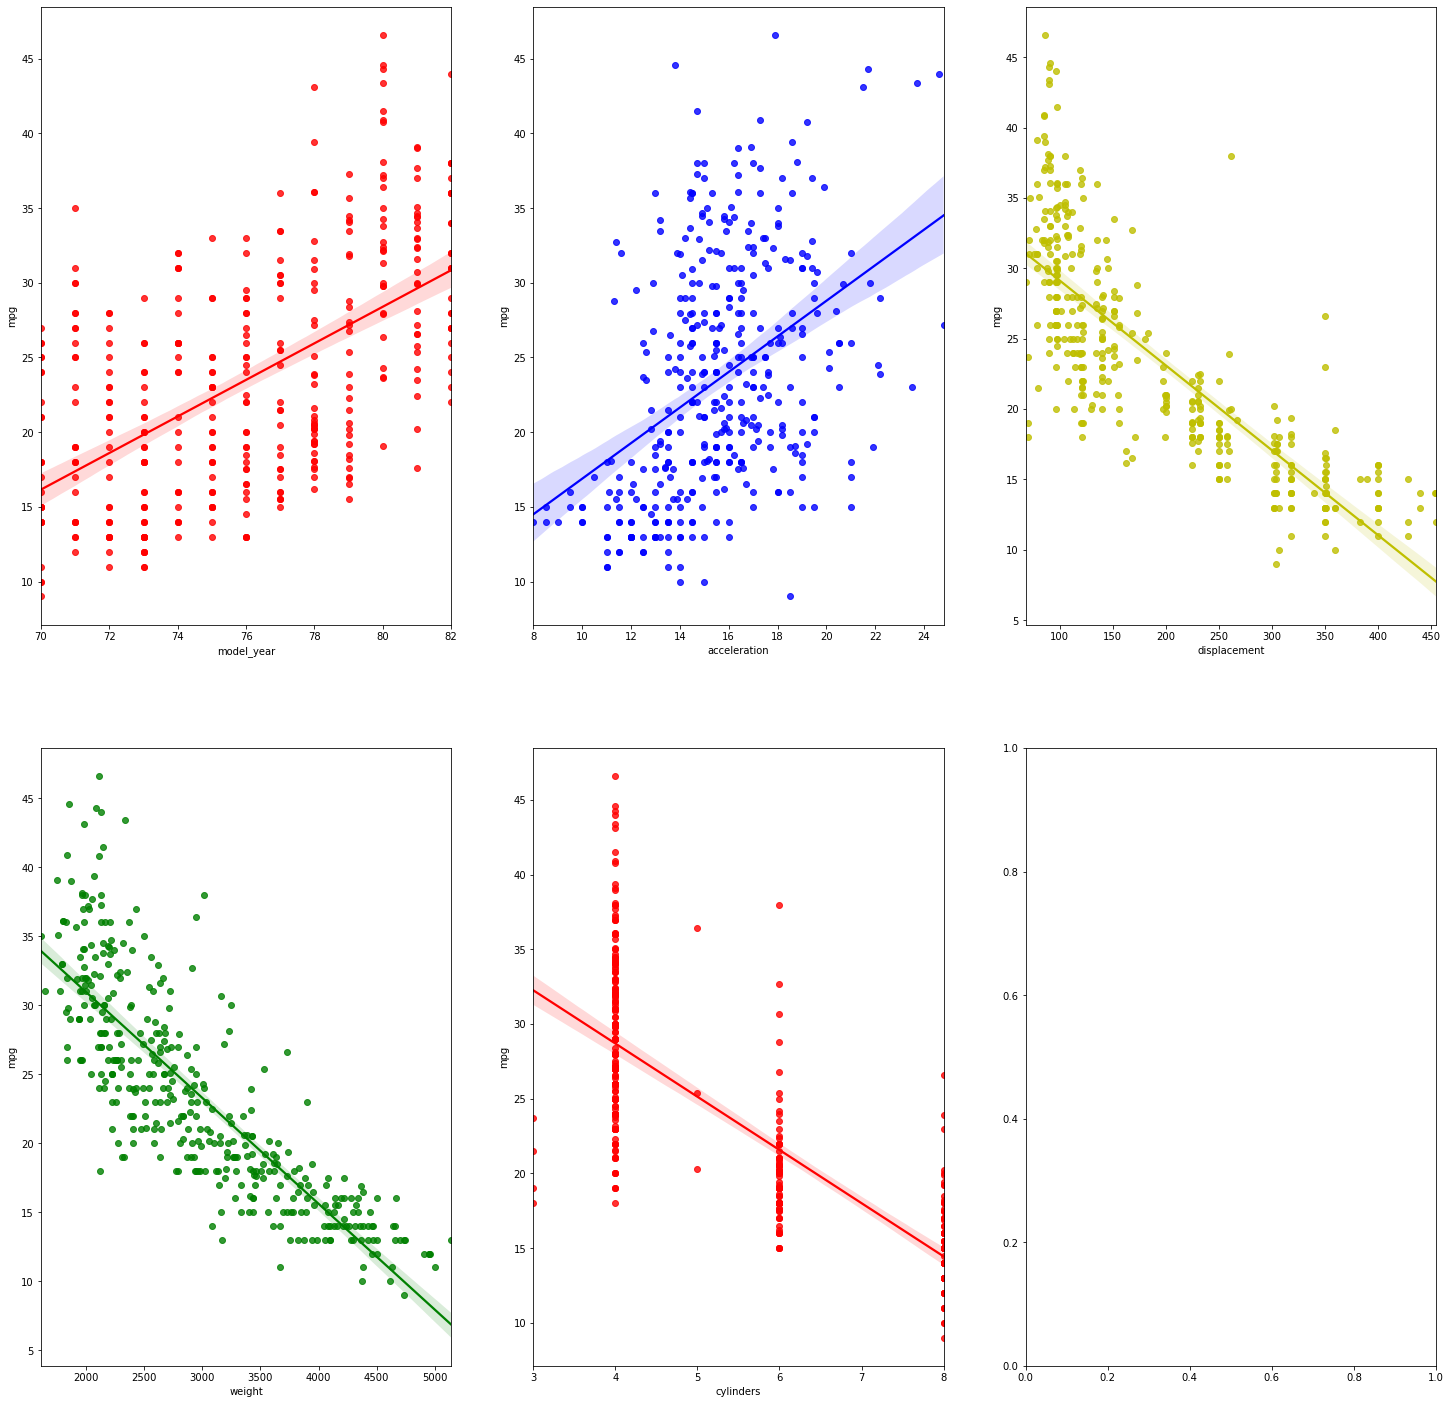

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(25,25))
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, features in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = features, y = 'mpg', data = df, ax=axs[row][col], color=plot_color[i])

In [38]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


'1.2.4'

ERROR: Invalid requirement: '=='


In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test, = train_test_split(cancer.data, cancer.target, random_state=1)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [89]:
X_train_s = scaler.transform(X_train)

In [90]:
X_train_s.shape

(426, 30)

In [91]:
#p182

In [57]:
from sklearn.datasets import make_blobs
from matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-57-f7d7eee9d060>, line 2)

In [92]:
from matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-92-819dae71ed12>, line 1)

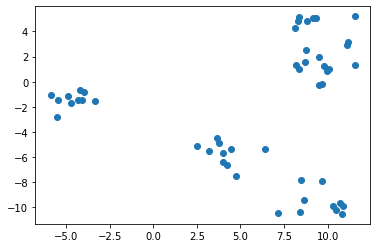

In [59]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=1)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

NameError: name 'x' is not defined

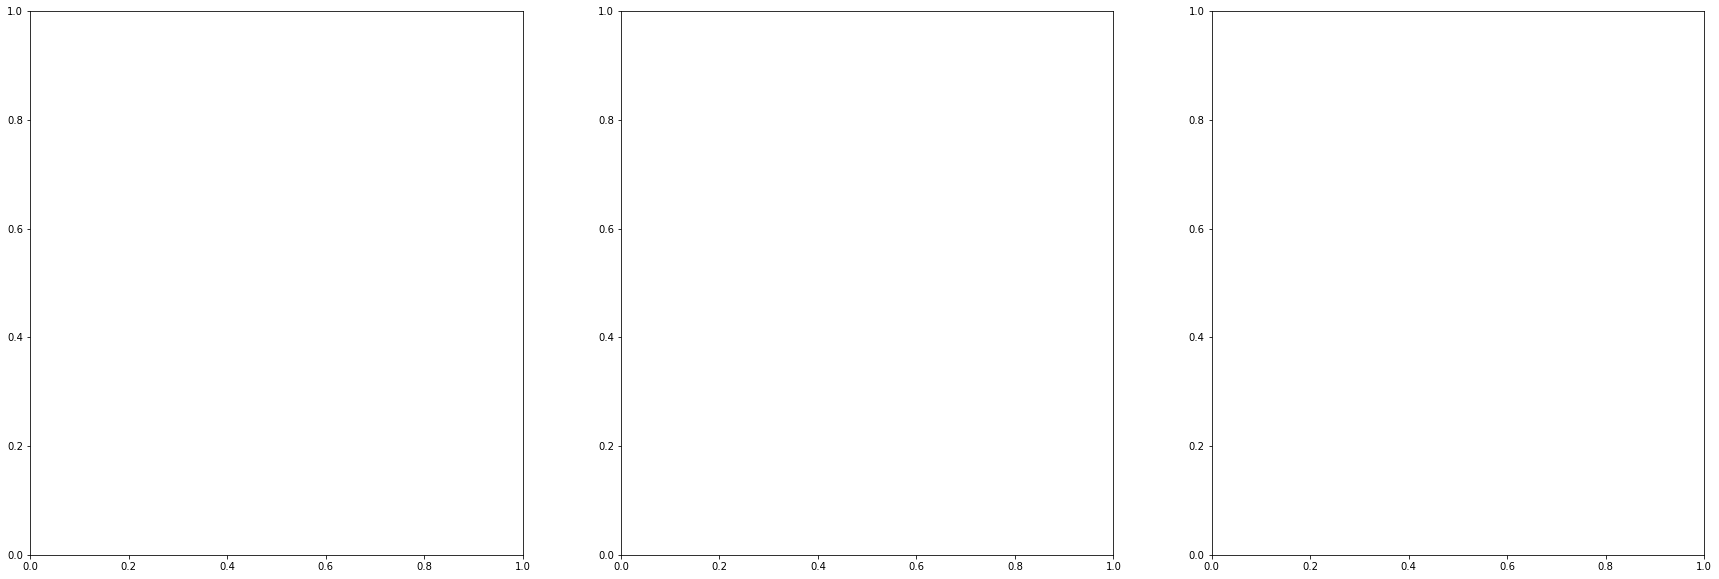

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
axes[0].scatter(x)


#scaler = MinMaxScaler().fit(X_train)
#X_train_s = scaler.transform(X_train)
#x_test_s = scaler.transform(X_test)

X_train_s = MinMaxScaler().fit_transform(X_train)
X_test_s = MinMaxScaler().fit_transform(X_test)

axes[2].scatter(X_train_s[:,0], X_train_s[:,1], c='r', s=150)
axes[2].scatter(X_test_s[:,0], X_test_s[:,1], c='b', s=200)
axes[2].set_titme("scaled")

In [93]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.6293706293706294

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

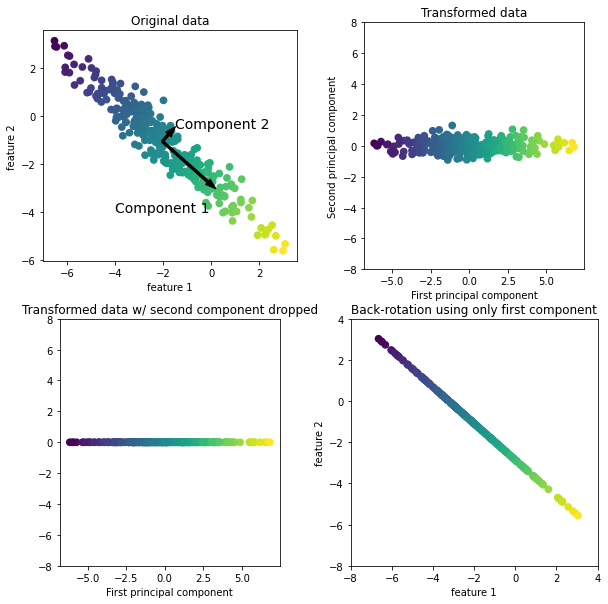

In [95]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [ ]:
# p199 L.17
# X_train_s

In [96]:
from sklearn.decomposition import PCA

In [98]:
# 데이터의 처음 두 개 주성분만 유지시킴
# 무슨정보인지는 모르지만 30개의 성분중에 가장 중요한 어떠한 데이터
pca = PCA(n_components=2)
# 유방암 데이톨 PCA모델 생성
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_S)

NameError: name 'X_train_S' is not defined

In [75]:
X_train_s.shape

(426, 30)

In [80]:
# 위의 30개 중에서 선택된것이 아니라, 수학적으로 선택됨
X_train_pca.shape

(426, 2)

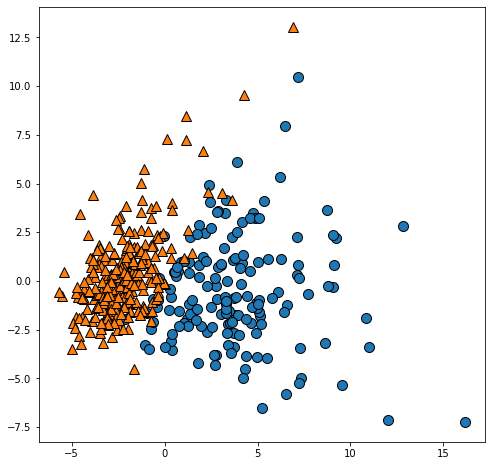

In [82]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1],
                        y_train)

In [105]:
print(pca.components_.shape)

(2, 30)


In [106]:
print(pca.components_)

[[ 0.22136524  0.10000219  0.22951811  0.22352098  0.14302288  0.24211071
   0.26026925  0.26425272  0.1342154   0.058505    0.20686479  0.00729622
   0.20987422  0.20223841  0.01725187  0.16639025  0.13855921  0.17994092
   0.02943904  0.10192967  0.23041956  0.100572    0.23779661  0.22751009
   0.13135979  0.21077884  0.2301419   0.25334406  0.11911651  0.13088259]
 [-0.2301732  -0.05721755 -0.21335503 -0.22693534  0.17877041  0.14744861
   0.06557463 -0.03134067  0.19050711  0.36396122 -0.10501365  0.0939736
  -0.0974744  -0.14961032  0.21204003  0.235435    0.21050921  0.15228014
   0.1810749   0.27867942 -0.2159829  -0.04249497 -0.20003599 -0.21518192
   0.17146856  0.13883173  0.10503362  0.00064033  0.14065767  0.27318654]]


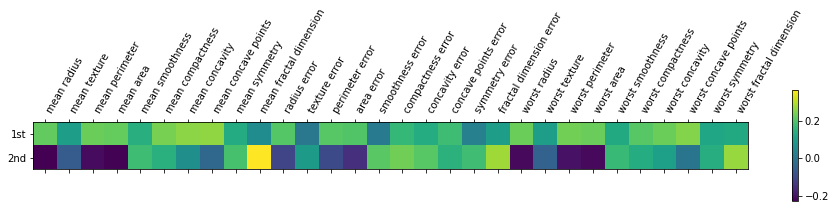

In [107]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ['1st', '2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.show()

In [ ]:
#p203 

In [111]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [113]:
people.images.shape

(3023, 87, 65)

In [114]:
image_shape = people.images[0].shape
image_shape

(87, 65)

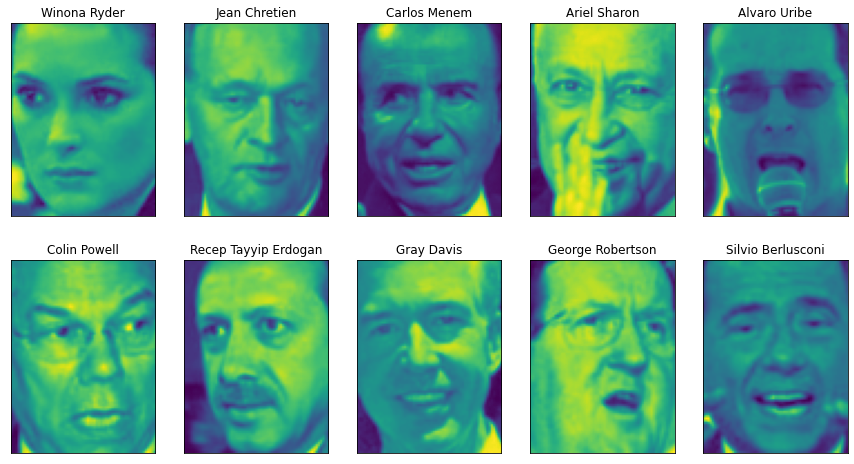

In [120]:
fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images,
                              axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [121]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [122]:
people.target_names.shape

(62,)

In [124]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end=' ')
    if (i+1)%3 ==0:
        print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [125]:
mask = np.zeros(people.target.shape, dtype=bool)
mask

array([False, False, False, ..., False, False, False])

In [129]:
# 타겟에서 특성을 뽑아내라
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

In [130]:
X_people.shape

(2063, 5655)

In [132]:
print(X_people[0].min(), X_people[0].max())
print(X_people[1].min(), X_people[1].max())
print(X_people[2].min(), X_people[2].max())

0.045751635 0.9607843
0.0052287583 0.94509804
0.018300653 0.99346405


In [131]:
X_people /= 255

In [ ]:
#preprocessing 끝
#분류기사용시작

In [142]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [143]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
knn2.score(X_test, y_test)

0.2131782945736434

In [144]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3.score(X_test, y_test)

0.2189922480620155

In [ ]:
#화이트닝 p206

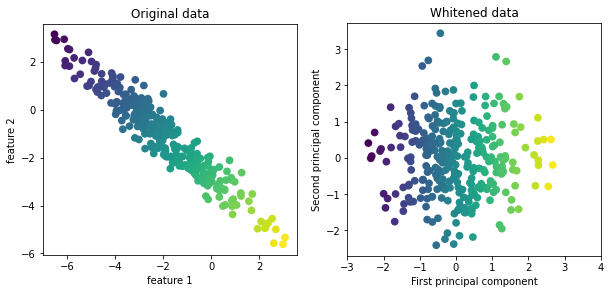

In [145]:
mglearn.plots.plot_pca_whitening()

KneighborsClassifeir 를 실행한 결과 정확도가 떨어짐 (지속적으로 21%수준)
PCA의 필요성이 대두됨
얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 가성비가 떨어짐.
픽셀을 사용해서 두 이미지를 비교할 떄, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교.
즉 얼굴 위치가 한 필셀만 오른쪽으로 이동하면 다른 얼굴로 인식
그래서 주 성분으로 변환하여 거리를 계산하면 정확도가 높아지지 않을까???
PCA-whitening 주성분의 스케일이 같아지도록 조정


In [148]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape", X_train_pca.shape)

X_train_pca.shape (1547, 100)


In [149]:
X_train.shape

(1547, 5655)

위의 두 개를 비교해보면 100개로 줄어듬 (특징점)

In [155]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.312015503875969

31%로 확률이 증가

In [159]:
pca = PCA(n_components=10, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.12015503875968993

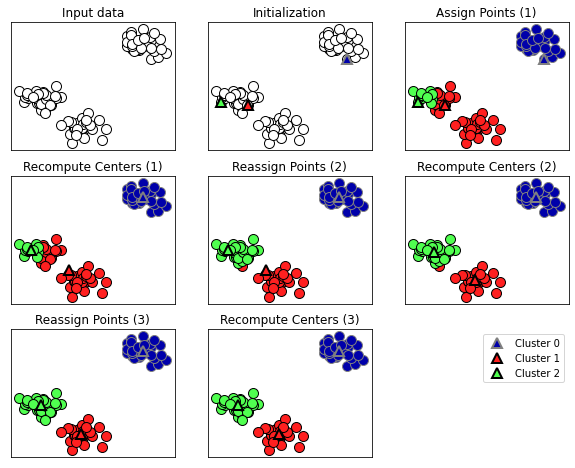

In [161]:
mglearn.plots.plot_kmeans_algorithm()